<font size="3">Questão de negócio.</font>

Nesse projeto, iremos ajudar a House Rocket, uma empresa fictícia, atuante no ramo imobiliário, que busca comprar casas por um menor preço, e revender por um valor maior, tendo a diferença do preço da compra e o preço da venda como seu lucro.

Iremos ajudar a empresa através de dados extraídos, fornecendo para o CEO da empresa as seguintes informações:
 °Quais imóveis a House Rocket deveria comprar e por qual preço?
 °Uma vez com o imóvel comprado, qual o melhor momento para vender o imóvel e por qual preço?
 
Com a resposta a essas perguntas, iremos entregar para o CEO, dois relatórios, sendo:
 °Relatório com as sugestões de compra de imóveis, e com o valor recomendado
 °Relatório com as sugestões de venda do imóvel, e com o valor recomendado
 


<font size="3">Premissas do Negócio</font>


<font size="3">Planejamento da solução</font>

Para resolver tal questão proposta pelo CEO da empresa fiz os seguintes passos:
°Coletei os dados do Kaggle.
°Agrupei os dados por região (zipcode).
°Dentro de cada região, encontrei a mediana dos preços dos imóveis.
°Vou sugerir os imóveis que estão com o preço de venda abaixo da preço mediano da região, e que estejam em boas condições.



<font size="3">Os 5 principais insights do projeto</font>


<font size="3">Resultados financeiros do projeto</font>

<font size="6">Imports.</font>

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import fixed
from IPython.core.display import HTML

<font size="6">EXTRACTION - Load Data</font>

In [9]:
#load data
data = pd.read_csv('kc_house_data.csv')

<font size="5">1 - Settings</font>

In [10]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18, 9]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    sns.set()
    
jupyter_settings()


def barplot(a,b,data):
    plot = sns.barplot(x=a, y=b, data=data, edgecolor='k', palette='flare')
    return plot

Populating the interactive namespace from numpy and matplotlib


<font size="5">2 - Verify Variable Types</font>

In [11]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<font size="5">3 - Change variable type</font>

In [12]:
data['date'] = pd.to_datetime(data['date'])

<font size="5">4 - Check NaN value</font>

In [13]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font size="5">5 - Descriptive Statistical</font>

In [14]:
statical = pd.DataFrame(data.describe().drop(['count', '75%']).T)

In [15]:
statical

,mean,std,min,25%,50%,max
id,4580301520.865,2876565571.312,1000102.000,2123049194.000,3904930410.000,9900000190.000
price,540088.142,367127.196,75000.000,321950.000,450000.000,7700000.000
bedrooms,3.371,0.930,0.000,3.000,3.000,33.000
bathrooms,2.115,0.770,0.000,1.750,2.250,8.000
sqft_living,2079.900,918.441,290.000,1427.000,1910.000,13540.000
sqft_lot,15106.968,41420.512,520.000,5040.000,7618.000,1651359.000
floors,1.494,0.540,1.000,1.000,1.500,3.500
waterfront,0.008,0.087,0.000,0.000,0.000,1.000
view,0.234,0.766,0.000,0.000,0.000,4.000
condition,3.409,0.651,1.000,3.000,3.000,5.000


<font size="6">CLEAN DATA</font>

<font size="5">1 - Delete Duplicate ID's</font>

In [16]:
data['id'].value_counts().head()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
Name: id, dtype: int64

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [18]:
data['id'].nunique()

21436

In [19]:
data.drop_duplicates(subset=['id'], inplace=True, keep='first')

In [20]:
data['id'].shape

(21436,)

<font size="5">2 - Checking Outliers</font>

<AxesSubplot:xlabel='price'>

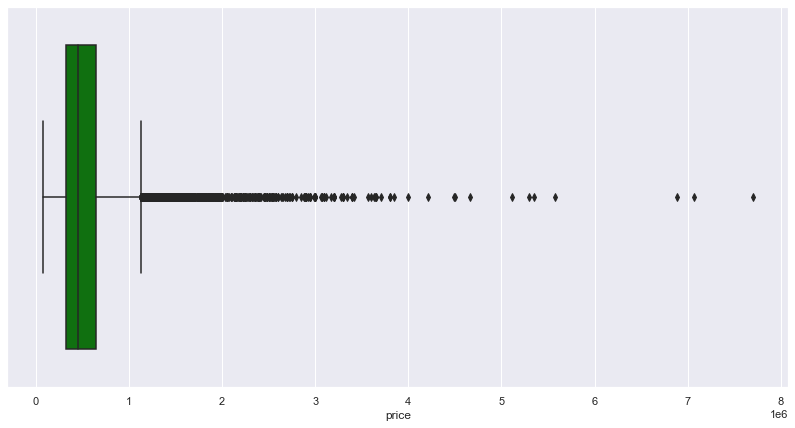

In [21]:
plt.figure(figsize=(14,7))
sns.boxplot(x=data['price'], color='green')


#about test of outliers, the amount of outliers will not impact the final result of the project

<font size="6">New Features</font>

In [22]:
#create new columns about dates
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['week_of_year'] = data['date'].dt.isocalendar().week

In [23]:
# converting sqft to m2

data['m2_living'] = data['sqft_living'].apply(lambda x: x*0.09290304)
data['m2_lot'] = data['sqft_lot'].apply(lambda x: x*0.09290304)
data['m2_basement'] = data['sqft_basement'].apply(lambda x: x*0.09290304)
data['m2_above'] = data['sqft_above'].apply(lambda x: x*0.09290304)

In [24]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,week_of_year,m2_living,m2_lot,m2_basement,m2_above
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,13,10,2014,42,109.626,524.902,0.000,109.626
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,9,12,2014,50,238.761,672.804,37.161,201.600
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,25,2,2015,9,71.535,929.030,0.000,71.535
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,9,12,2014,50,182.090,464.515,84.542,97.548
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,18,2,2015,8,156.077,750.657,0.000,156.077


<font size="6">1.0 Business Questions</font>

<font size="5">Informações:</font>

Após uma limpeza prévia dos dados, onde ajustamos algumas colunas, criamos novas colunas, ajustamos os tipos de váriaveis,
é hora de começarmos a resolver as questões do CEO com embasamento dos dados que extraímos do DF, nos próximos códigos, você conseguirá compreender
a realização dos seguintes passos:

°Agrupar os imóveis por região ( zipcode ).

°Dentro de cada região, eu vou encontrar a mediana do preço do imóvel.

°Sugerir os imóveis que estão abaixo do preço mediano da região e que estejam e boas condições(condition >=4).

In [25]:
#seting new features and take price per zipcode median
data['status'] = "NA"

df = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df2 = pd.merge(data, df, on='zipcode', how='inner')


In [26]:
#testing new features
df2.head()

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,week_of_year,m2_living,m2_lot,m2_basement,m2_above,status,price_y
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,13,10,2014,42,109.626,524.902,0.000,109.626,NA,279000.000
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,0,0,4,6,880,0,1945,0,98178,47.501,-122.248,1190,6780,23,6,2014,26,81.755,629.883,0.000,81.755,NA,279000.000
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,0,2,3,8,1620,480,1967,0,98178,47.509,-122.244,2660,8712,17,7,2014,29,195.096,761.898,44.593,150.503,NA,279000.000
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,3,7,1300,0,1961,0,98178,47.505,-122.255,1320,7619,25,9,2014,39,120.774,547.942,0.000,120.774,NA,279000.000
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,0,0,3,6,860,0,1931,0,98178,47.505,-122.272,1650,8775,27,2,2015,9,79.897,489.135,0.000,79.897,NA,279000.000


In [27]:
#add sugestions houses buy in DF

for i in range(len(df2)):
    if (df2.loc[i, 'price_x'] <= df2.loc[i, 'price_y']) & (df2.loc[i, 'condition'] >= 4):
        df2.loc[i, 'status'] = 'compra sugerida'
    else:
        df2.loc[i, 'status'] = 'compra nao sugerida'

In [28]:
#rename price_y for price_median.
df2['price_median'] = df2['price_y']
df2 = df2.drop('price_y', axis = 1)

In [29]:
#create new dataframe with only buy suggestions
data_buy = df2[['id', 'date', 'lat', 'long', 'price_x', 'bedrooms', 'bathrooms', 'zipcode', 'price_median', 'status']].loc[df2['status'] == 'compra sugerida']

In [30]:
#take the profit with houses sell
data_buy['profit'] = data_buy[['price_x', 'price_median']].apply(lambda x: x['price_median'] - x['price_x'], axis=1)
print('Lucro total das vendas: {}'.format(data_buy['profit'].sum())) 

Lucro total das vendas: 376310918.5


In [45]:
#testing new df
data_buy

,id,date,lat,long,price_x,bedrooms,bathrooms,zipcode,price_median,status,profit
1,4060000240,2014-06-23,47.501,-122.248,205425.000,2,1.000,98178,279000.000,compra sugerida,73575.000
10,561000075,2014-12-31,47.505,-122.259,260000.000,3,1.000,98178,279000.000,compra sugerida,19000.000
19,3352402236,2014-12-15,47.498,-122.263,252500.000,3,2.000,98178,279000.000,compra sugerida,26500.000
27,185000118,2015-02-23,47.495,-122.266,212000.000,4,2.000,98178,279000.000,compra sugerida,67000.000
35,3810000465,2014-05-20,47.497,-122.231,243000.000,2,1.000,98178,279000.000,compra sugerida,36000.000
66,8068000585,2014-08-27,47.507,-122.265,235000.000,2,1.000,98178,279000.000,compra sugerida,44000.000
68,7129300420,2014-12-02,47.511,-122.256,258000.000,3,1.750,98178,279000.000,compra sugerida,21000.000
79,1180008315,2014-07-15,47.492,-122.224,212000.000,3,1.000,98178,279000.000,compra sugerida,67000.000
110,1180007005,2014-06-25,47.493,-122.224,265950.000,3,1.500,98178,279000.000,compra sugerida,13050.000
114,4058801065,2014-08-08,47.503,-122.242,272000.000,3,2.000,98178,279000.000,compra sugerida,7000.000


In [25]:
#export DF suggestions buy for CSV File

In [26]:
data_buy.to_csv('suggested_buys.csv')

In [37]:
min_price = data_buy['price_x'].min()
max_price = data_buy['price_x'].max()

In [38]:
#filter for map

f_price = widgets.IntSlider(
    min=min_price,
    max=max_price,
    step=1,
    description='Max Price:',
    disabled=False,
)

In [40]:
data.buy

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,week_of_year,m2_living,m2_lot,m2_basement,m2_above,status,price_median
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,13,10,2014,42,109.626,524.902,0.000,109.626,compra nao sugerida,279000.000
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,0,0,4,6,880,0,1945,0,98178,47.501,-122.248,1190,6780,23,6,2014,26,81.755,629.883,0.000,81.755,compra sugerida,279000.000
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,0,2,3,8,1620,480,1967,0,98178,47.509,-122.244,2660,8712,17,7,2014,29,195.096,761.898,44.593,150.503,compra nao sugerida,279000.000
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,3,7,1300,0,1961,0,98178,47.505,-122.255,1320,7619,25,9,2014,39,120.774,547.942,0.000,120.774,compra nao sugerida,279000.000
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,0,0,3,6,860,0,1931,0,98178,47.505,-122.272,1650,8775,27,2,2015,9,79.897,489.135,0.000,79.897,compra nao sugerida,279000.000


In [41]:
#map for best view of suggested buys houses

def update_map(data, f_price):
    
    houses = data_buy[data_buy['price_x'] < f_price]
    fig = px.scatter_mapbox(houses,
                            lat='lat',
                            lon='long',
                            color='price_x',
                            size='profit',
                            color_continuous_scale=px.colors.cyclical.IceFire, 
                            size_max=20, 
                            zoom=12)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    fig.show()

In [42]:
widgets.interactive( update_map, data=fixed(data_buy), f_price = f_price)

interactive(children=(IntSlider(value=89000, description='Max Price:', max=1880000, min=89000), Output()), _do…

<font size="6">2.0 Business Questions</font>

<font size="5">Segunda etapa</font>

Nessa segunda etapa do projeto, iremos com base nos dados, descobrir a melhor época do ano, onde a House Rocket poderá ter mais lucro ao vender as casas, para isso iremos:

°Agrupar os imoveis por região(zipcode) e por sazonalidade(estações do ano)

°Dentro de cada região e sazonalidade, calcular a mediana do preço

°Condições de venda:

    -Se o preço da compra for maior que a mediana da região + sazonalidade
        
        O preço da venda será igual ao preço da compra + 10%
    
    - Se o preço da compra for menor que a mediana da região + sazonalidade
        
        O preço da venda será igual ao preço da compra + 30%
        

In [33]:
df2['season'] = 'na'

df2['season'] = df2['week_of_year'].apply(lambda x: 'summer' if (x >= 25) & (x <= 38) 
                                            else 'fall' if (x >= 39) & (x <= 50) 
                                            else 'spring' if (x > 11) & (x<= 24) 
                                            else 'winter')

In [43]:
df2.head()

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,week_of_year,m2_living,m2_lot,m2_basement,m2_above,status,price_median
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,13,10,2014,42,109.626,524.902,0.000,109.626,compra nao sugerida,279000.000
1,4060000240,2014-06-23,205425.000,2,1.000,880,6780,1.000,0,0,4,6,880,0,1945,0,98178,47.501,-122.248,1190,6780,23,6,2014,26,81.755,629.883,0.000,81.755,compra sugerida,279000.000
2,4058801670,2014-07-17,445000.000,3,2.250,2100,8201,1.000,0,2,3,8,1620,480,1967,0,98178,47.509,-122.244,2660,8712,17,7,2014,29,195.096,761.898,44.593,150.503,compra nao sugerida,279000.000
3,2976800796,2014-09-25,236000.000,3,1.000,1300,5898,1.000,0,0,3,7,1300,0,1961,0,98178,47.505,-122.255,1320,7619,25,9,2014,39,120.774,547.942,0.000,120.774,compra nao sugerida,279000.000
4,6874200960,2015-02-27,170000.000,2,1.000,860,5265,1.000,0,0,3,6,860,0,1931,0,98178,47.505,-122.272,1650,8775,27,2,2015,9,79.897,489.135,0.000,79.897,compra nao sugerida,279000.000
